In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('C:/Users/SUDHANSHU/Desktop/ML data/Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
#dummy=pd.get_dummies(data.Species)
data=data.replace(to_replace=['Iris-setosa','Iris-versicolor','Iris-virginica'],value=[1,2,3])
data=data.drop(['Id'],axis=1)
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,3
146,6.3,2.5,5.0,1.9,3
147,6.5,3.0,5.2,2.0,3
148,6.2,3.4,5.4,2.3,3


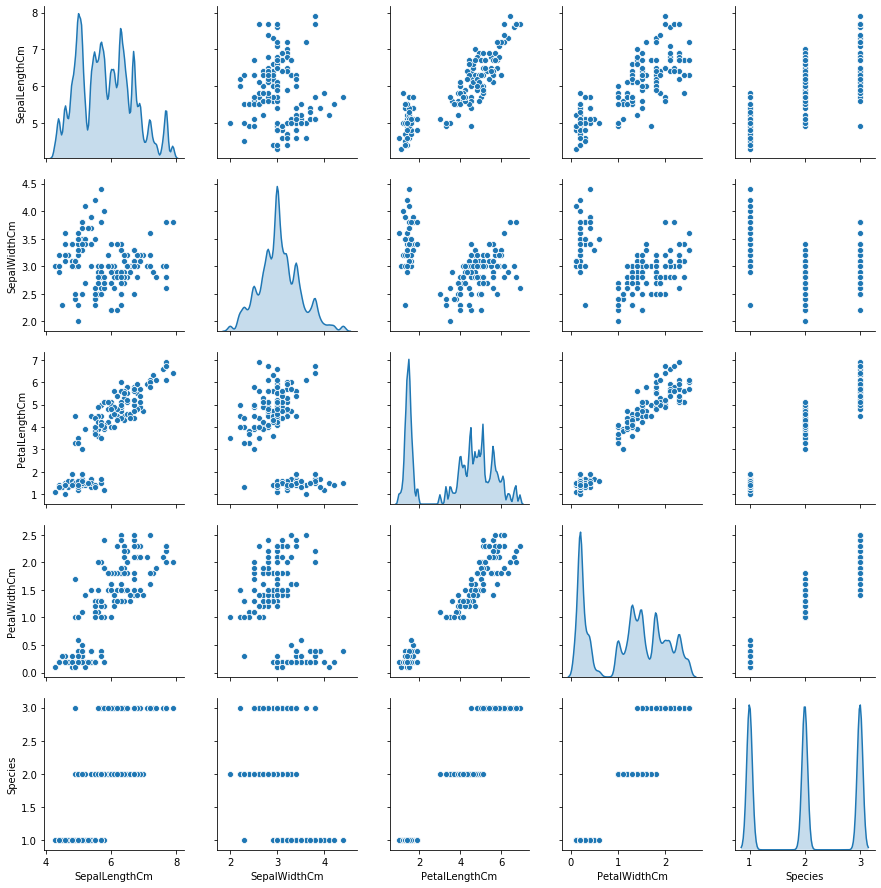

In [4]:
sns.pairplot(data,diag_kind='kde', diag_kws=dict(shade=True, bw=.05, vertical=False))
plt.show()


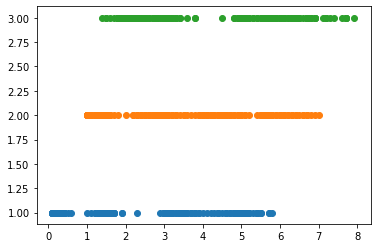

In [6]:
import numpy as np
X_data=data.iloc[:,[0,1,2,3]]
Y_data=data.iloc[:,-1]
X_train=X_data
#print(X_data)
Y_train=Y_data
#print(Y_train)
x_pos = np.array([X_train.iloc[i] for i in range(len(Y_train)) 
                                    if Y_train[i] == 1]) 
  
#print(x_pos) 
#print(x_pos[:,0])

    
# Negative Data Points 

x_neg = np.array([X_train.iloc[i] for i in range(len(X_train)) 
                                    if Y_train[i] == 2])

x_pos2=np.array([X_train.iloc[i] for i in range(len(X_train))
                                    if Y_train[i] == 3])



#Y1=np.concatenate((x_pos[:,1],x_pos[:,1],x_pos[:,1],x_pos[:,]),axis=0)
#print(len(X),len(Y1))
X=np.concatenate((x_pos[:,0],x_pos[:,1],x_pos[:,2],x_pos[:,3]),axis=0)
Y=np.concatenate((x_neg[:,0],x_neg[:,1],x_neg[:,2],x_neg[:,3]),axis=0)
Z=np.concatenate((x_pos2[:,0],x_pos2[:,1],x_pos2[:,2],x_pos2[:,3]),axis=0)
#print(Y,np.array(2)*len(Y))
plt.scatter(X,np.ones(len(X)))
plt.scatter(Y,np.array([2]*len(Y)))
plt.scatter(Z,np.array([3]*len(Z)))
plt.show()



In [7]:

x_data=data.iloc[:,[0,1,2,3]].values
y_data=data.iloc[:,-1].values

from sklearn.model_selection import train_test_split
#tts=train_test_split()
X_train,X_test,Y_train,Y_test=train_test_split(x_data,y_data,test_size=0.25,random_state=0)


In [9]:
from sklearn.linear_model import LogisticRegression
lgr=LogisticRegression(random_state=0)
lgr.fit(X_train,Y_train)

C:\Users\SUDHANSHU\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\SUDHANSHU\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [10]:
Y_pred=lgr.predict(X_test)
from sklearn.metrics import accuracy_score
print('THE ACCURACY IS :',accuracy_score(Y_test,Y_pred))

THE ACCURACY IS : 0.868421052631579


In [13]:
import statsmodels.api as sm
est = sm.OLS(Y_train,X_train).fit()

est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.989
Model:                            OLS   Adj. R-squared (uncentered):              0.988
Method:                 Least Squares   F-statistic:                              2345.
Date:                Wed, 01 Jan 2020   Prob (F-statistic):                   5.97e-104
Time:                        23:22:51   Log-Likelihood:                          3.4096
No. Observations:                 112   AIC:                                      1.181
Df Residuals:                     108   BIC:                                      12.05
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0613      0.063      0.970      0.334      -0.064       0.186
x2             0.0653      0.073      0.895      0.373      -0.079       0.210
x3             0.2225      0.075      2.961      0.004       0.074       0.371
x4             0.5076      0.124      4.097      0.000       0.262       0.753
==============================================================================
Omnibus:                        1.040   Durbin-Watson:                   1.528
Prob(Omnibus):                  0.594   Jarque-Bera (JB):                0.578
Skew:                           0.062   Prob(JB):                        0.749
Kurtosis:                       3.330   Cond. No.                         53.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
print(lgr.coef_[0],lgr.intercept_[0])

[ 0.40385719  1.34115677 -2.13187622 -0.96502847] 0.25239546064449364


In [23]:
y=lgr.coef_[0][0]*+lgr.coef_[0][1]*data.SepalWidthCm+lgr.coef_[0][2]*data.PetalLengthCm+lgr.coef_[0][3]*data.PetalWidthCm+lgr.intercept_
x=np.linspace(0,len(data.PetalWidthCm),len(data.PetalWidthCm))
plt.scatter(x,y)
plt.show()

ValueError: operands could not be broadcast together with shapes (150,) (3,) 